In [1]:
# Import modules
# ipython magic to plot in line
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.max_open_warning': 0})
import xarray as xr
from astropy.io import ascii
import pytz
# OS interaction
import sys
import os

In [2]:
# Directories
# Path to raw data
file_in   = os.path.normpath(r'F:\Work\e\Data\Obs\Canada_Project_Sites\Nov_2014_snow_storm_data\QC_netcdf\CRHO.nc')

In [8]:
# Set font size
font = {'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

In [4]:
# Import stations of interest
CRHO_data = xr.open_dataset(file_in,engine='netcdf4')

In [5]:
# Sort variables by alpha
AllVars = sorted(CRHO_data.data_vars)

In [6]:
# Remove metadata (and variables that are empty (i.e. diagnostic ones))
[AllVars.remove(cV) for cV in ['Elevation','Lat','Lon','Albedo','NetRadiation','SnowDepthQCvalue']]

[None, None, None]

AirMoistureContentA
AirtemperatureA
Albedo
DownwardSolarRadiation
DownwardTerrestrialRad
IncrementalPrecipitationA
IncrementalPrecipitationB
NetRadiation
ScalarWindSpeedA
ScalarWindSpeedB
SnowDepthA
SnowDepthQCvalue
SnowLayerTemperatureA
SnowWaterEquivelentA
SoilHeatFluxA
SoilMoistureA
SoilMoistureB
SoilMoistureC
SoilMoistureD
SoilMoistureE
SoilTemperatureA
SoilTemperatureB
SoilTemperatureC
SoilTemperatureD
SoilTemperatureE
TotalPressureAdjustedtoSea-level
TotalPressureUnadjustedA
UpwardSolarRadiation
UpwardTerrestrialRad
WindDirectionatA


C:\Users\new356\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['Times'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


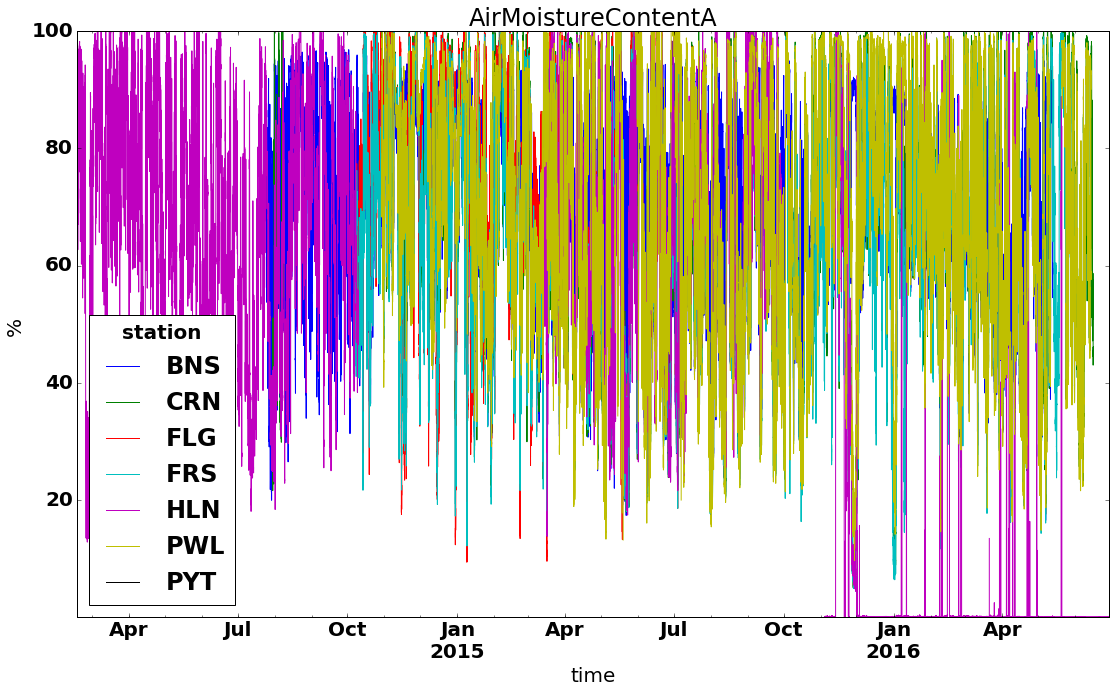

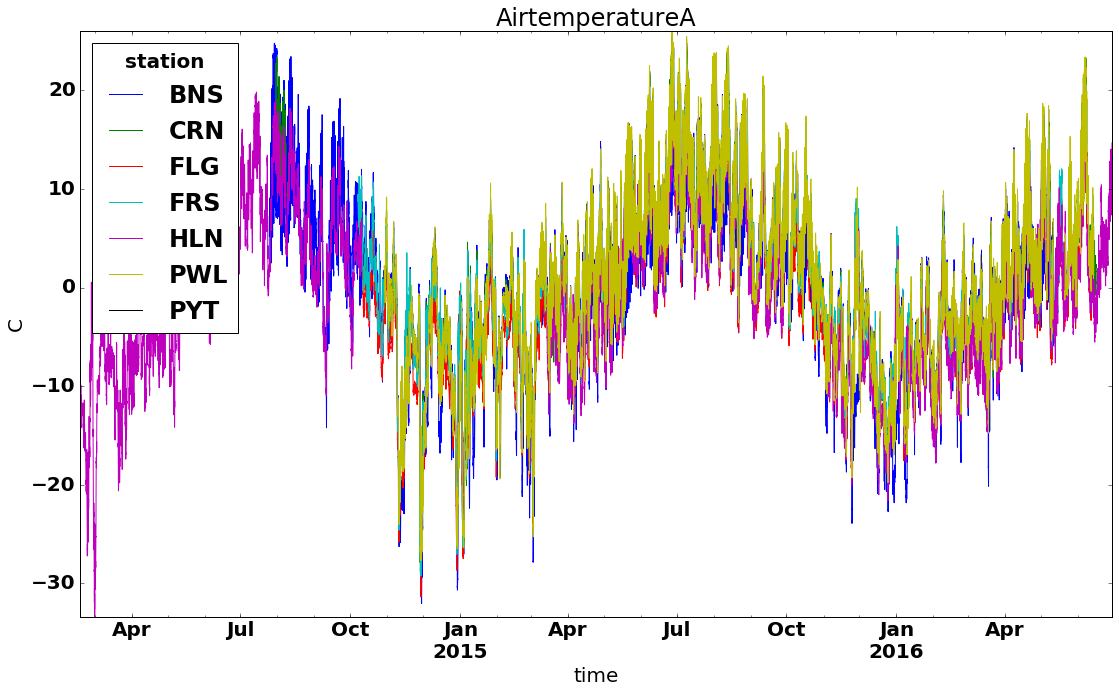

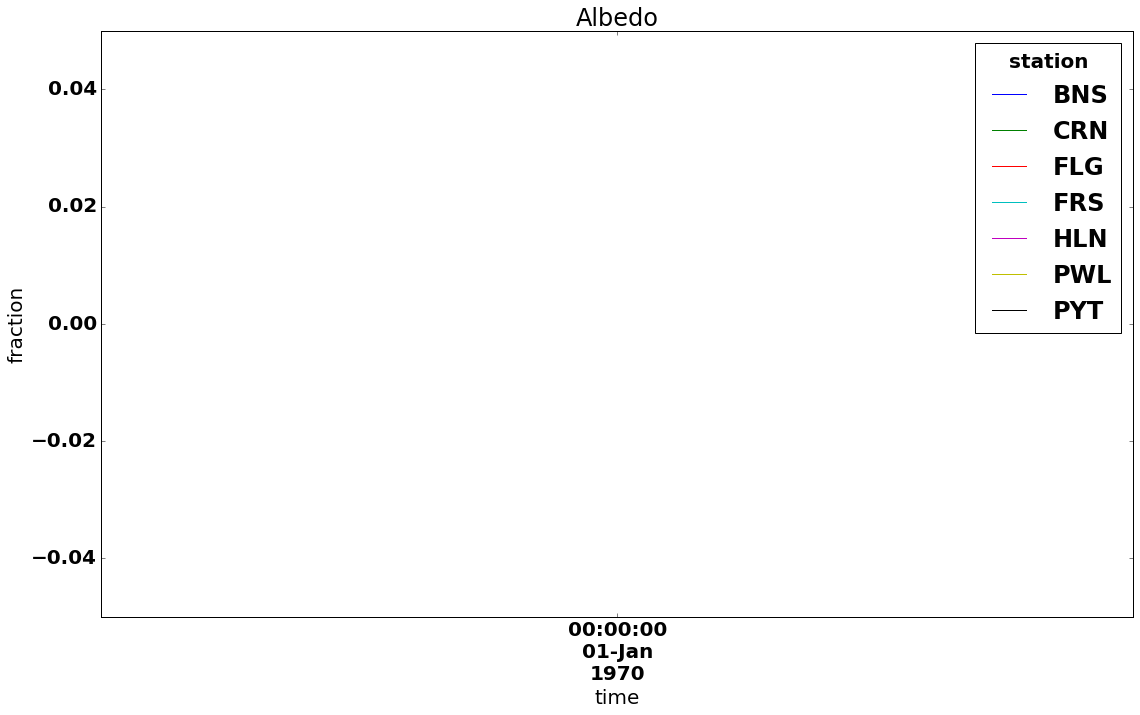

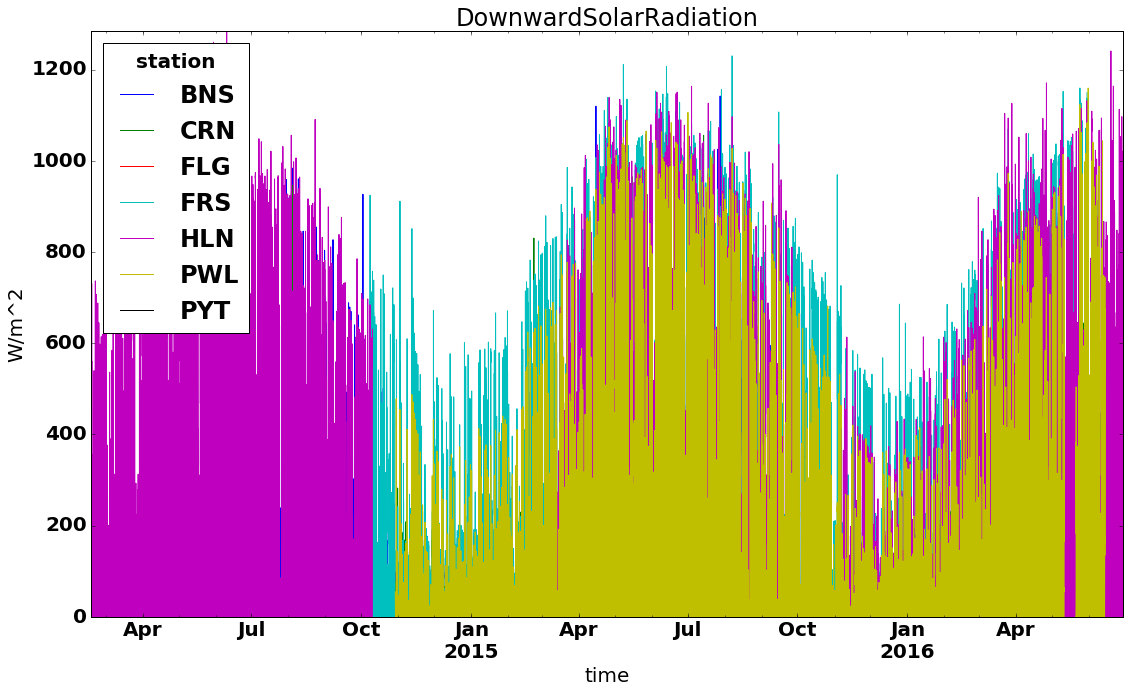

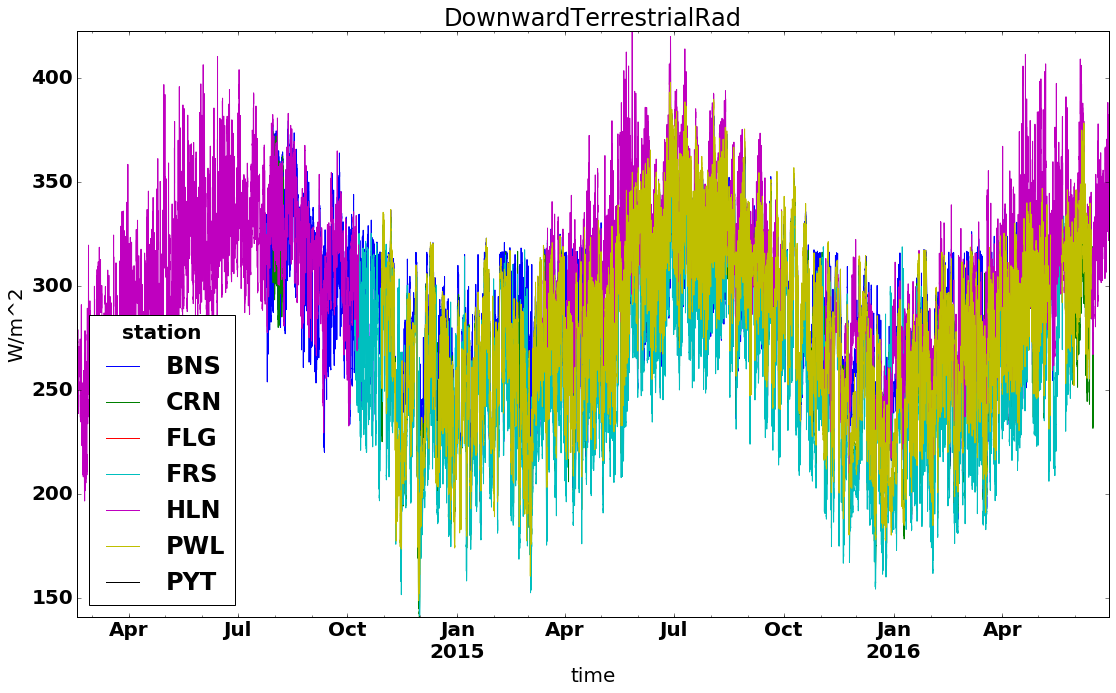

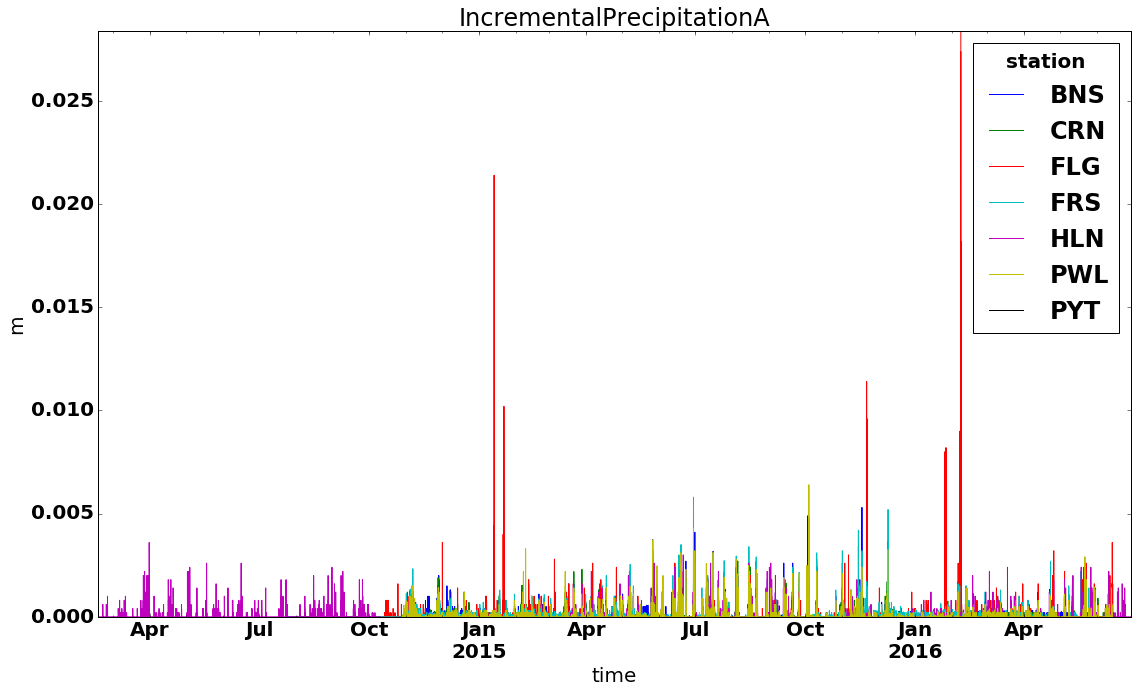

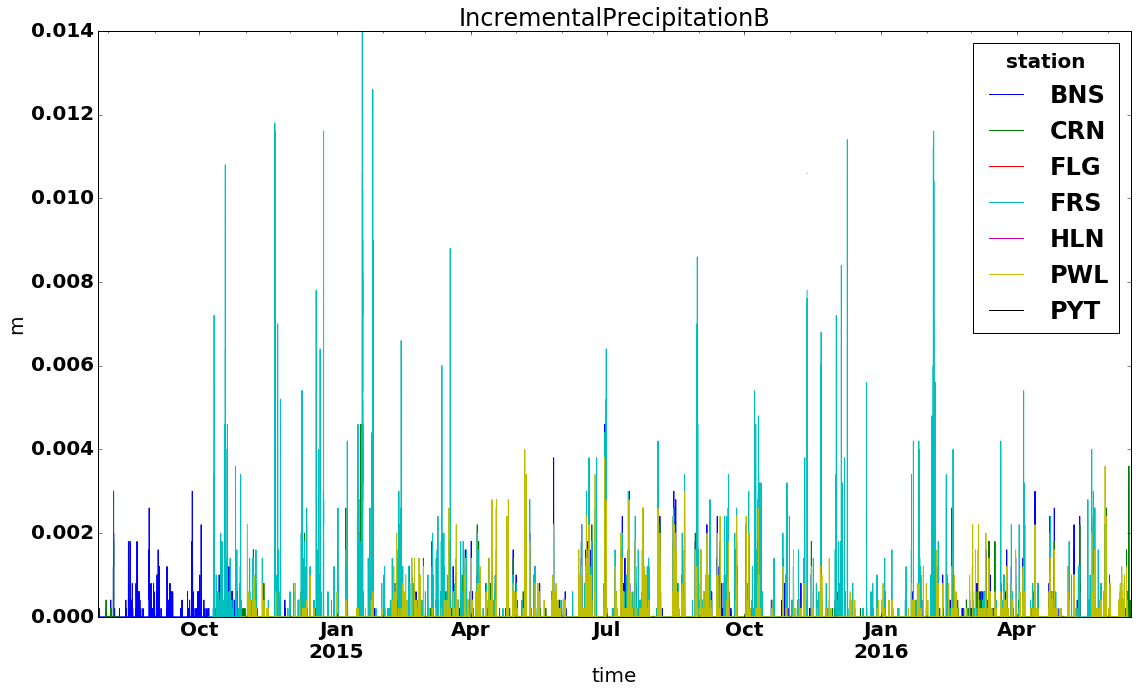

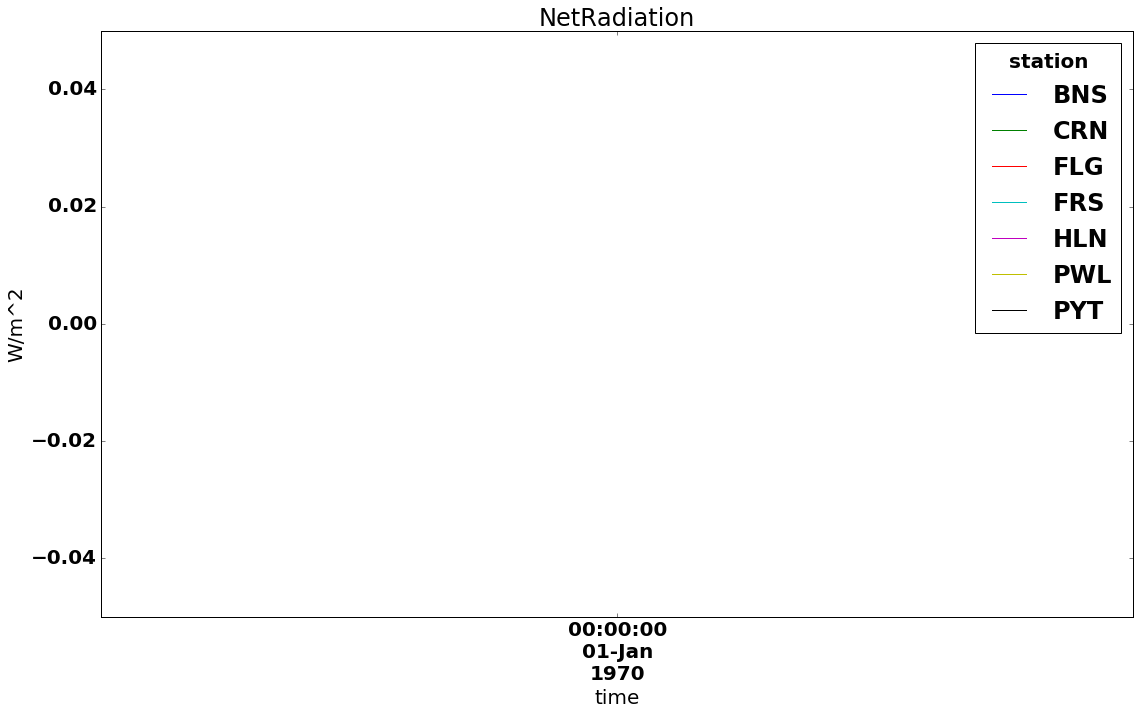

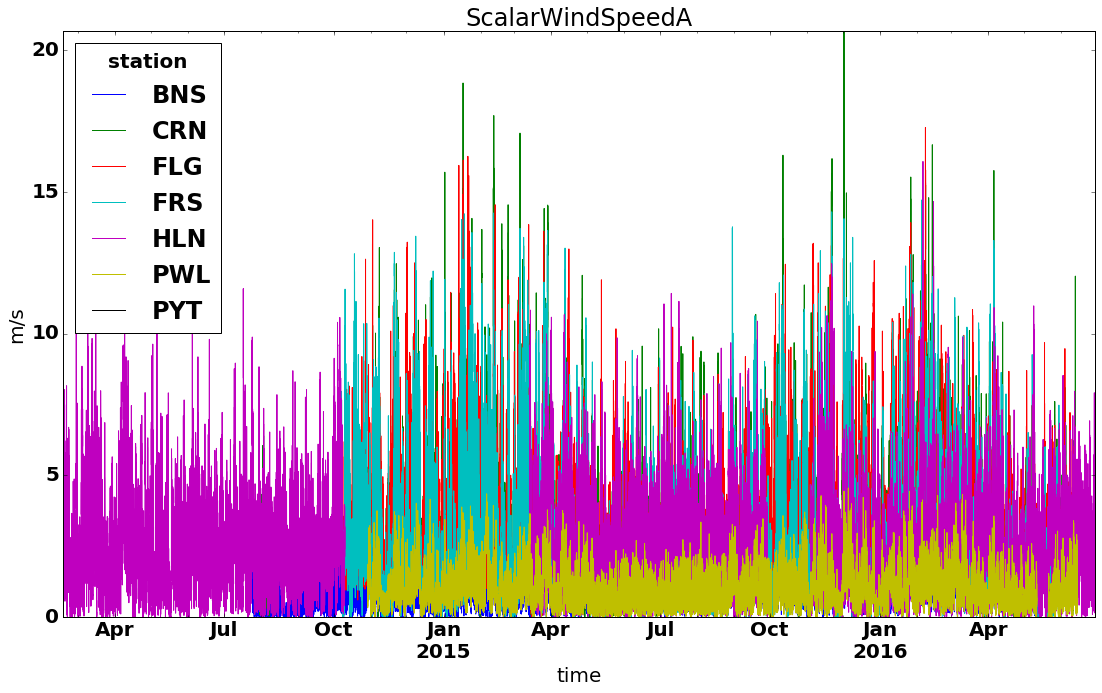

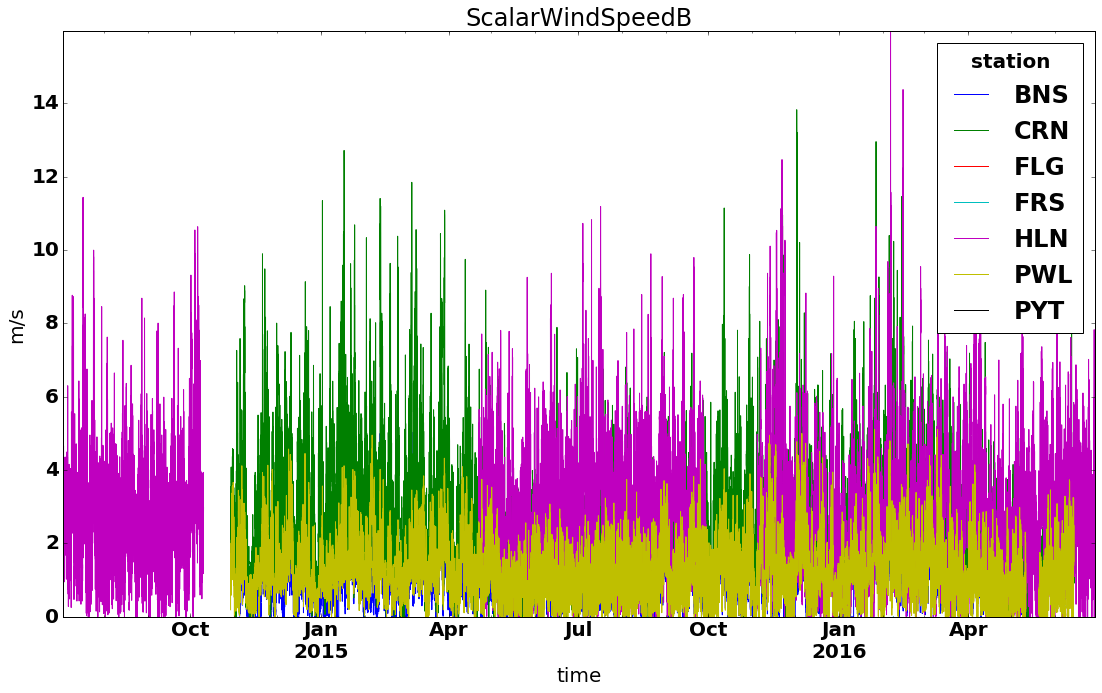

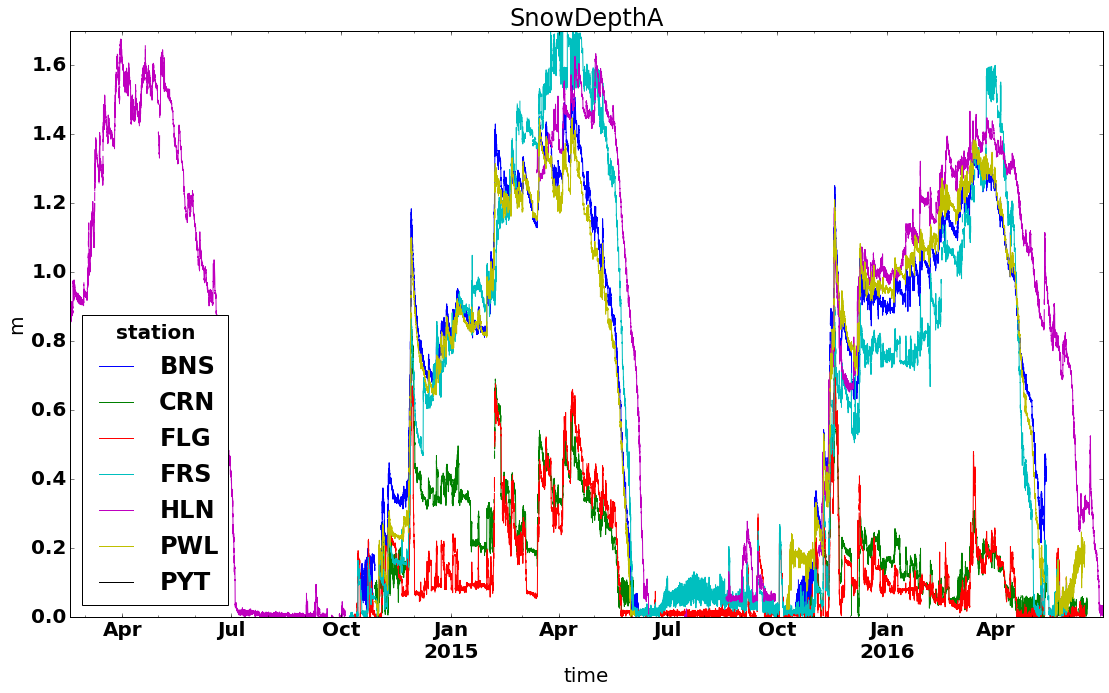

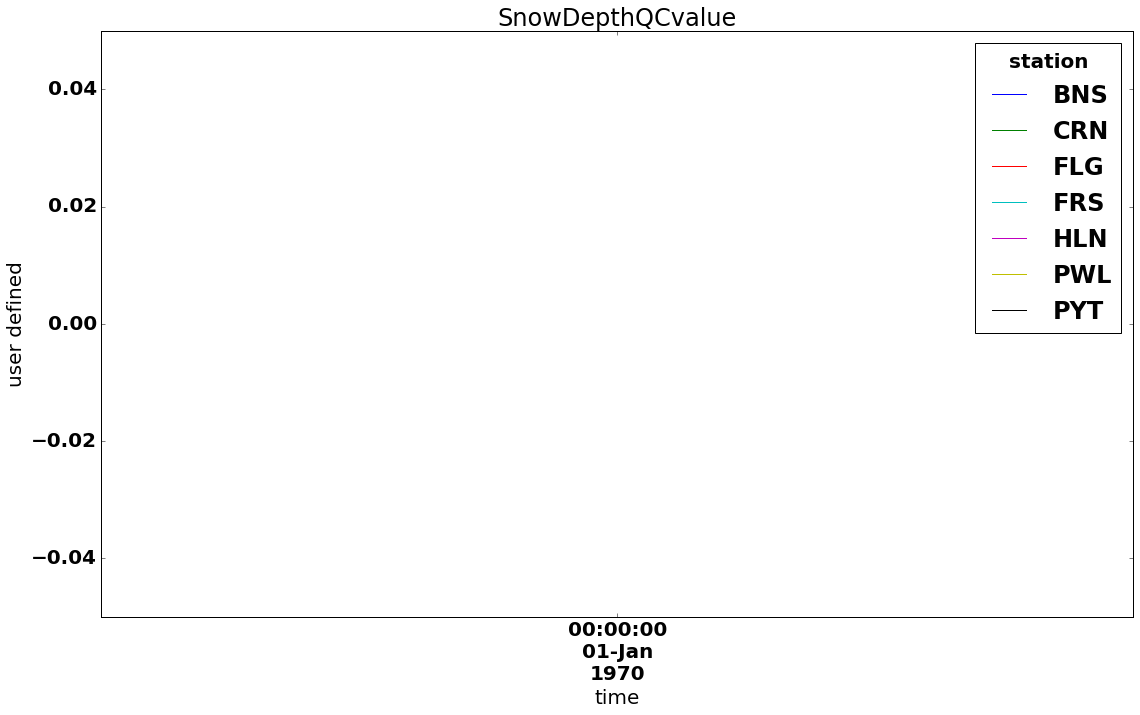

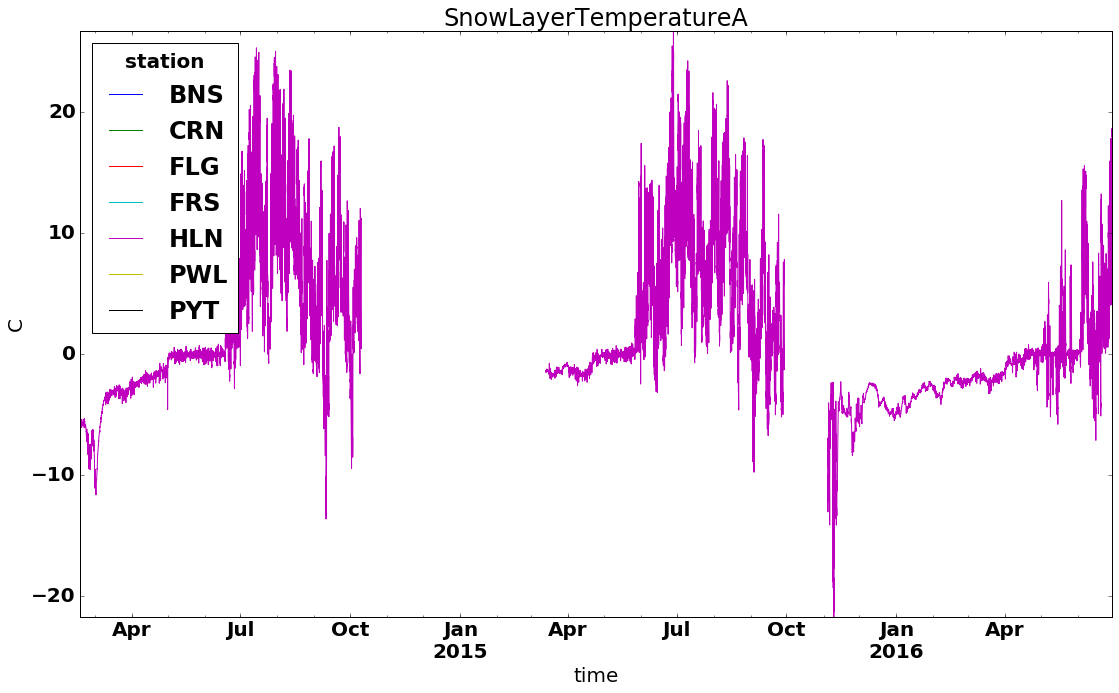

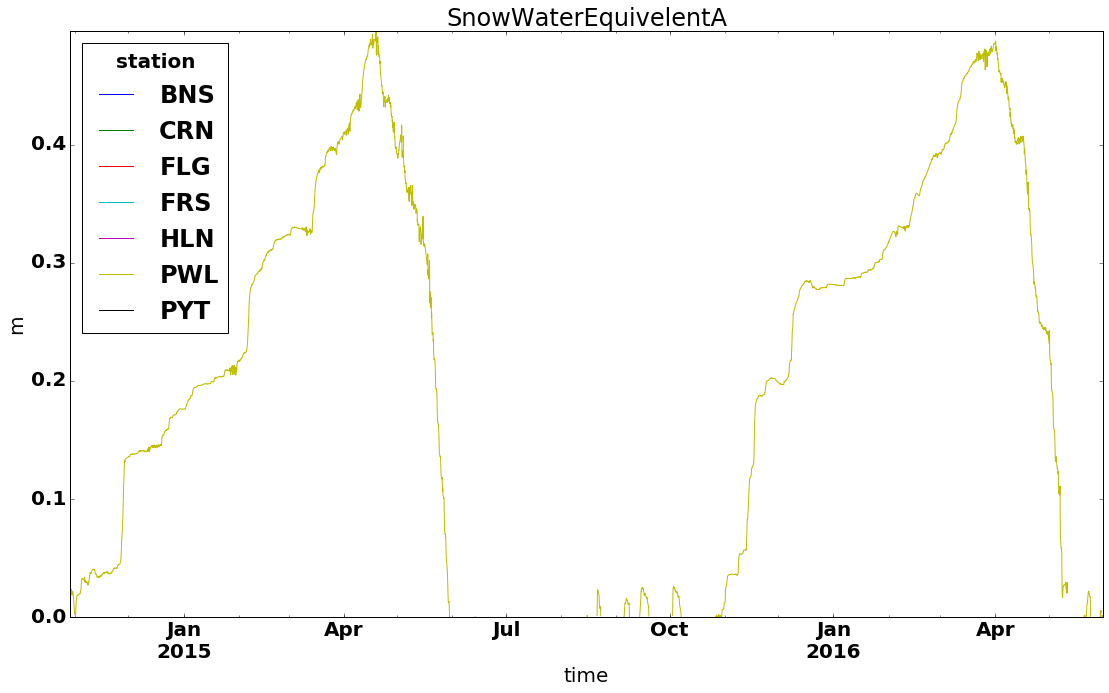

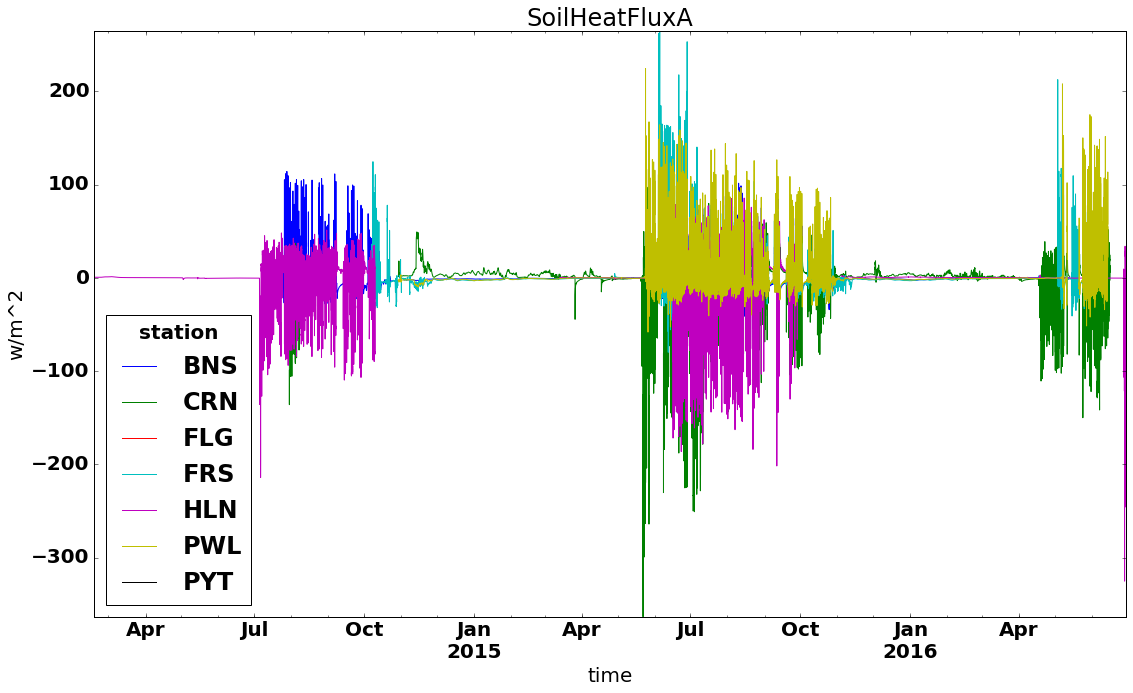

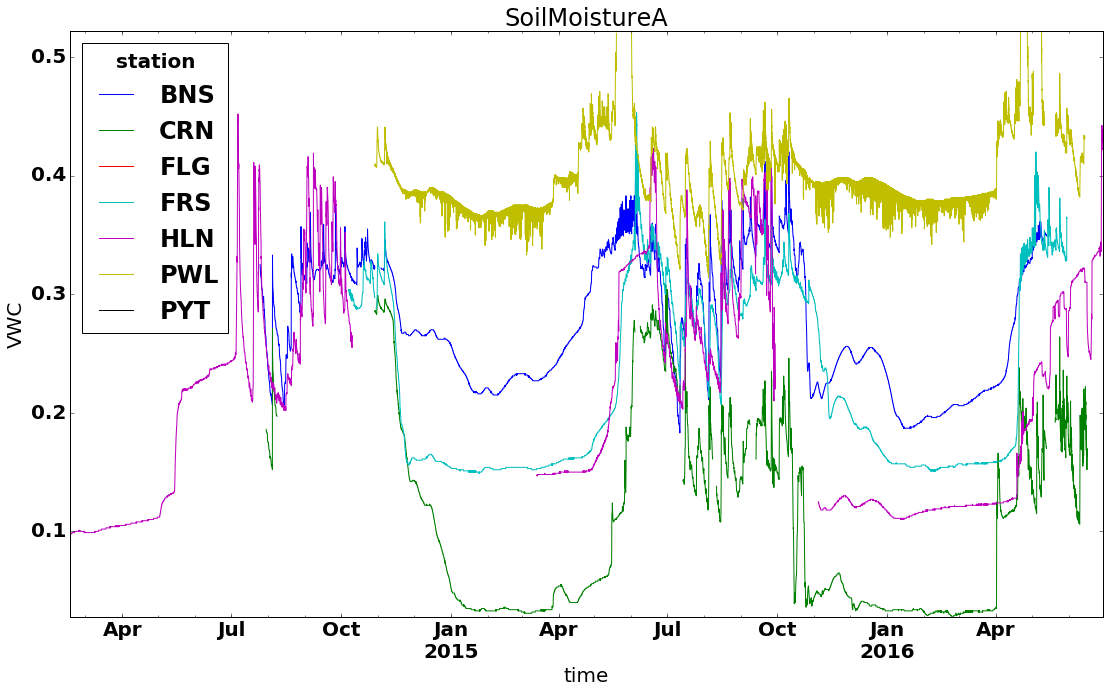

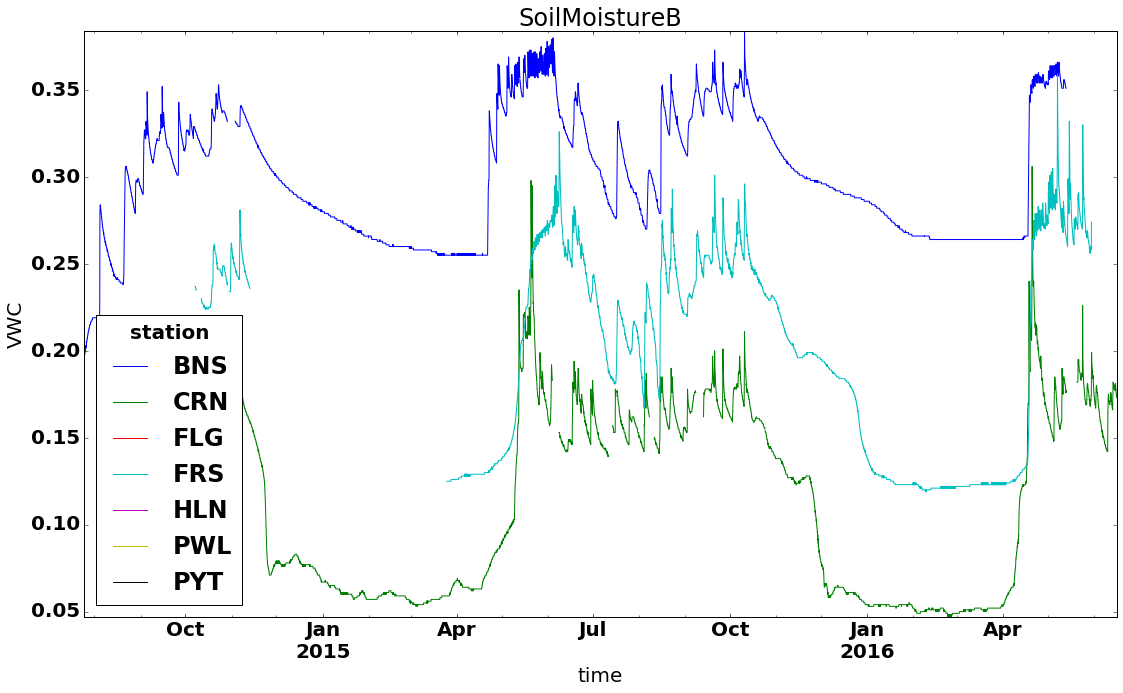

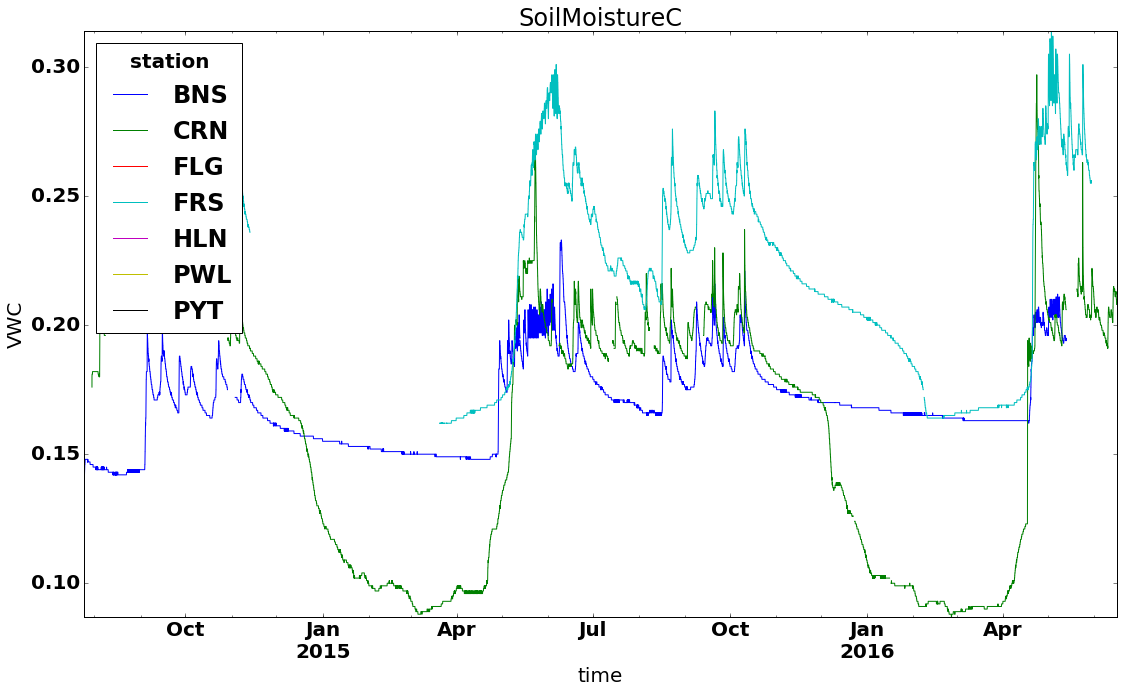

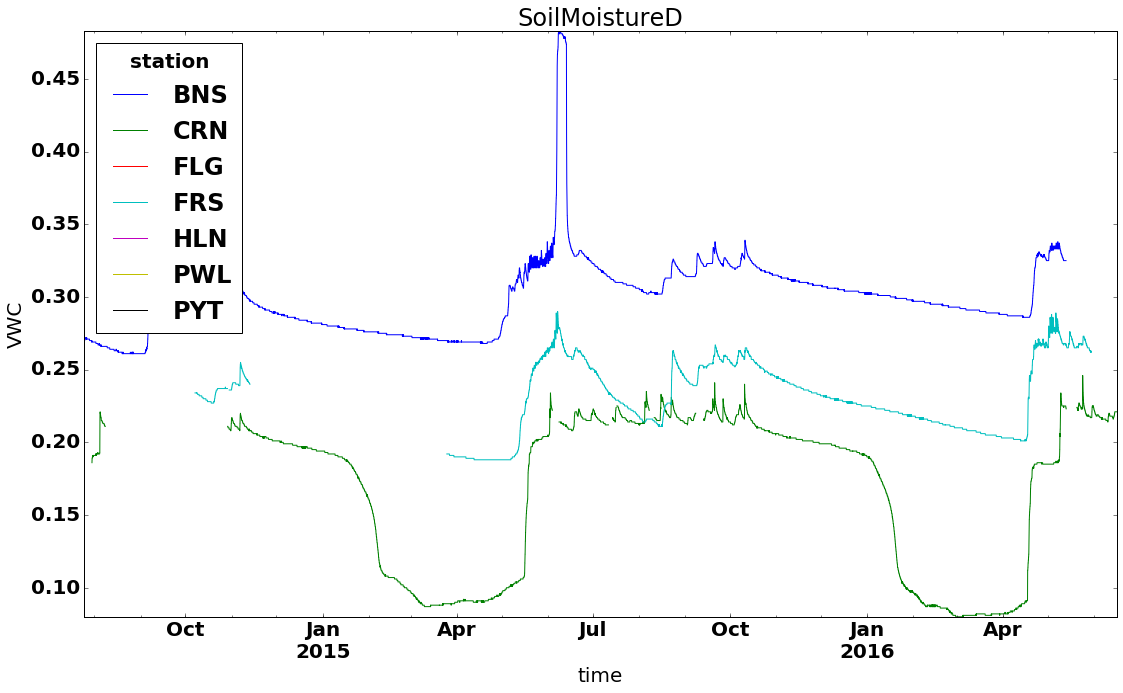

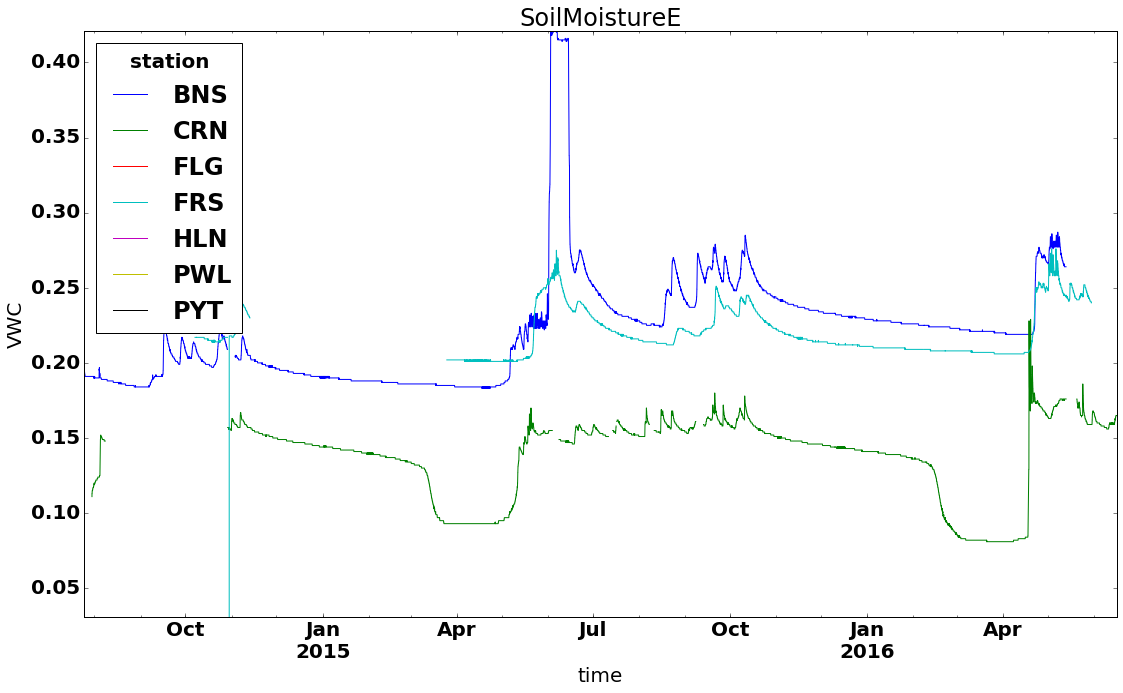

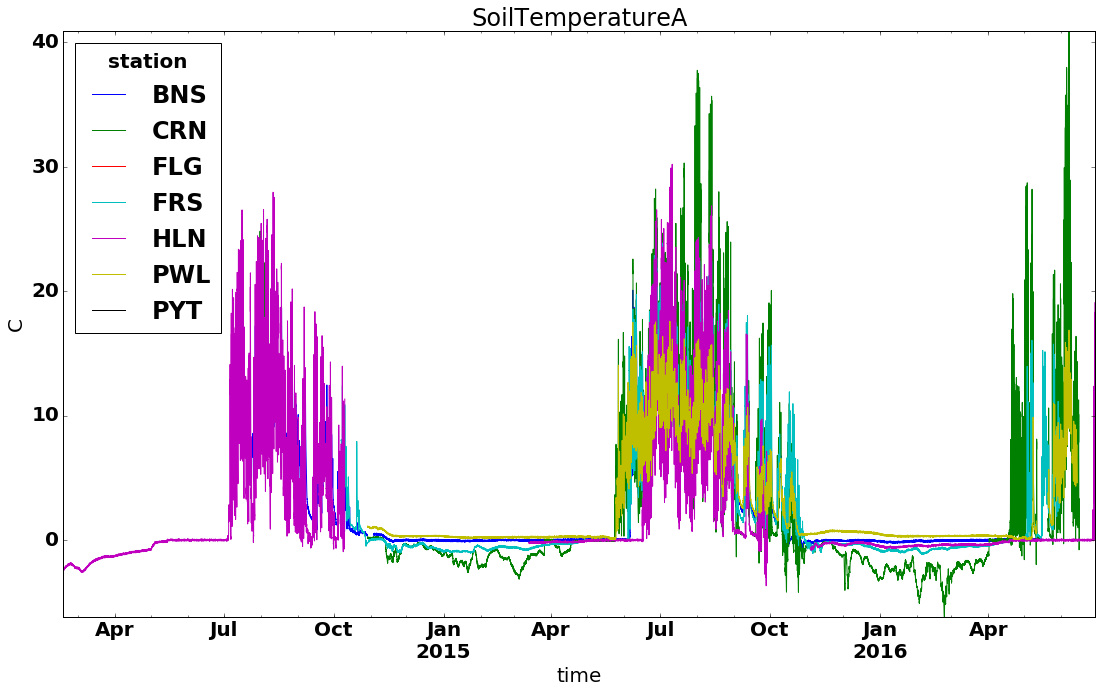

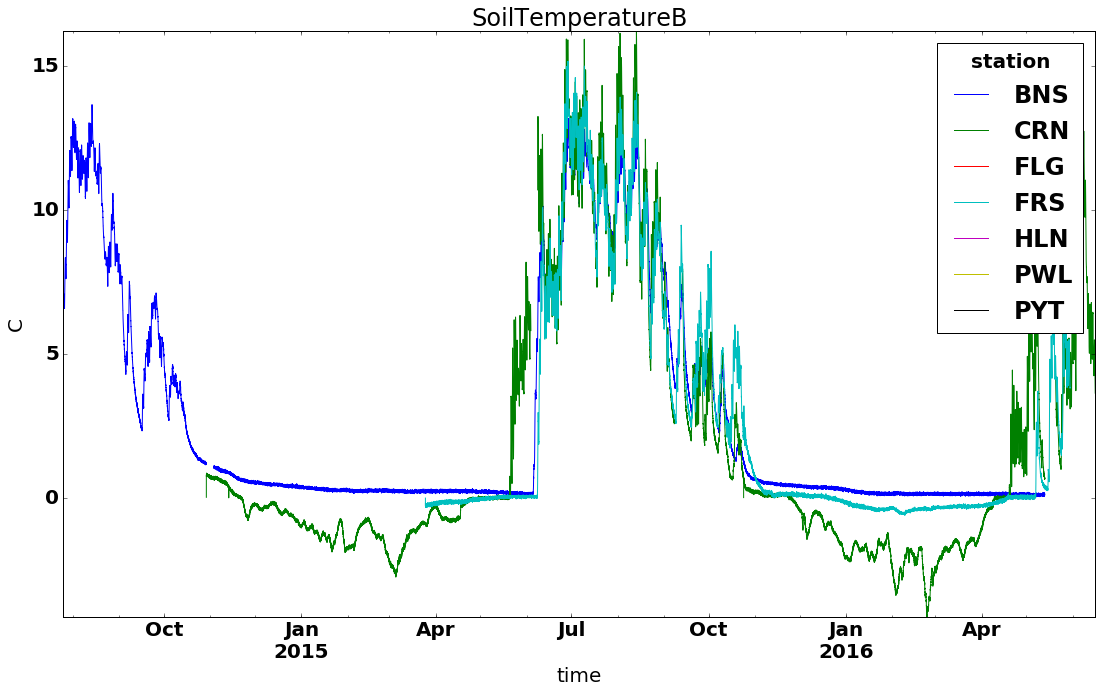

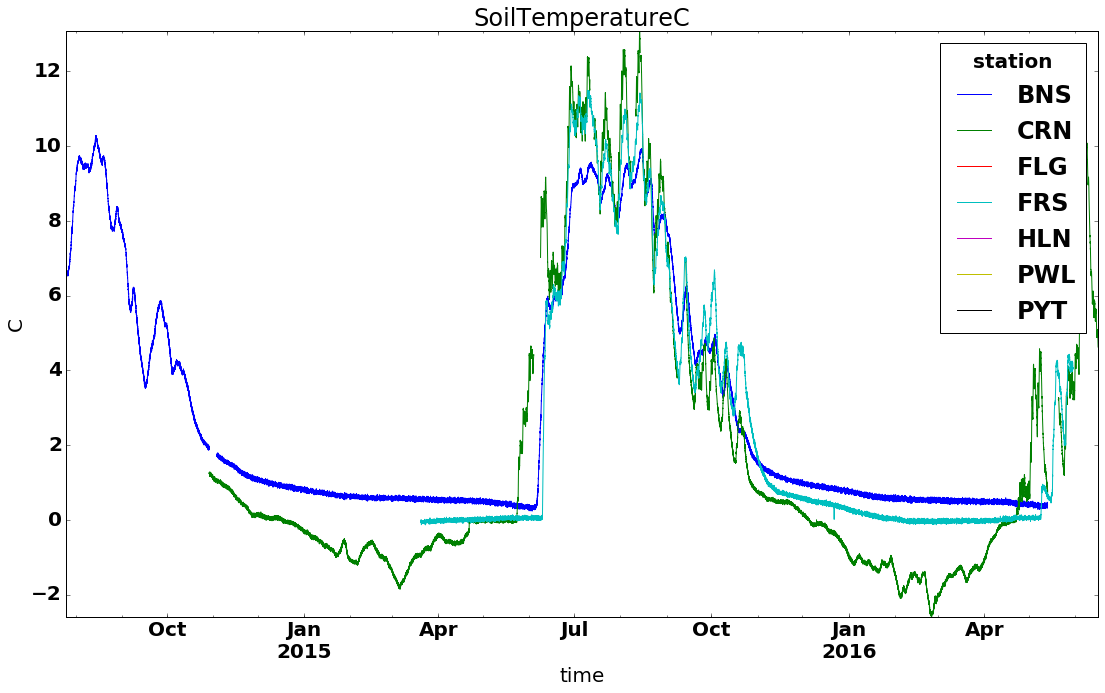

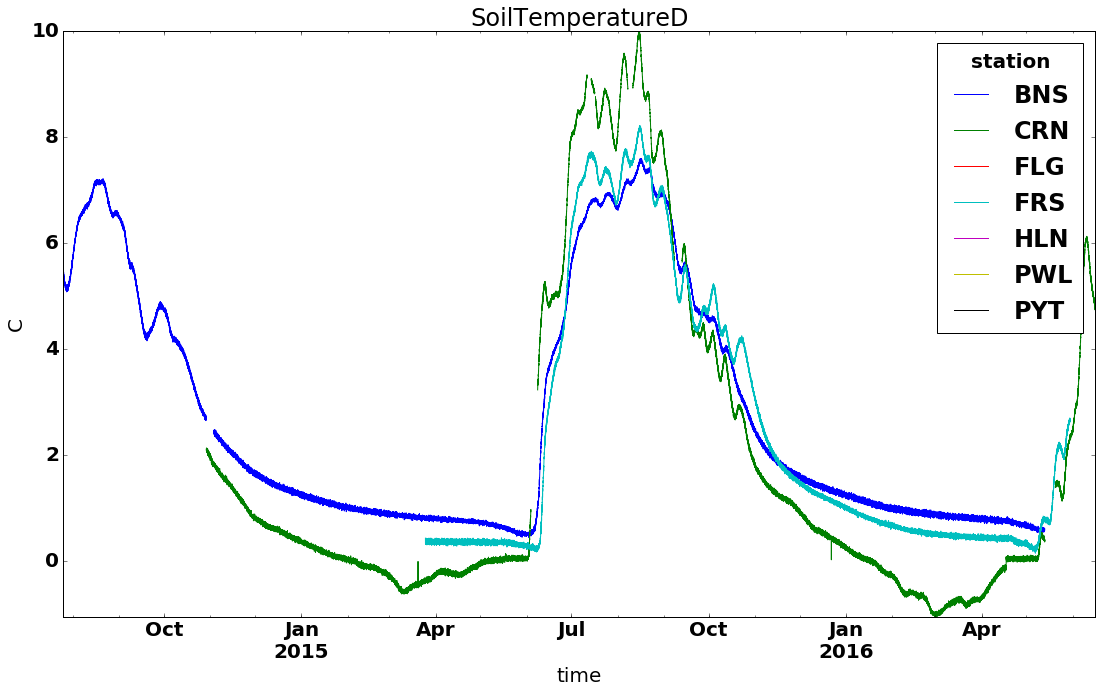

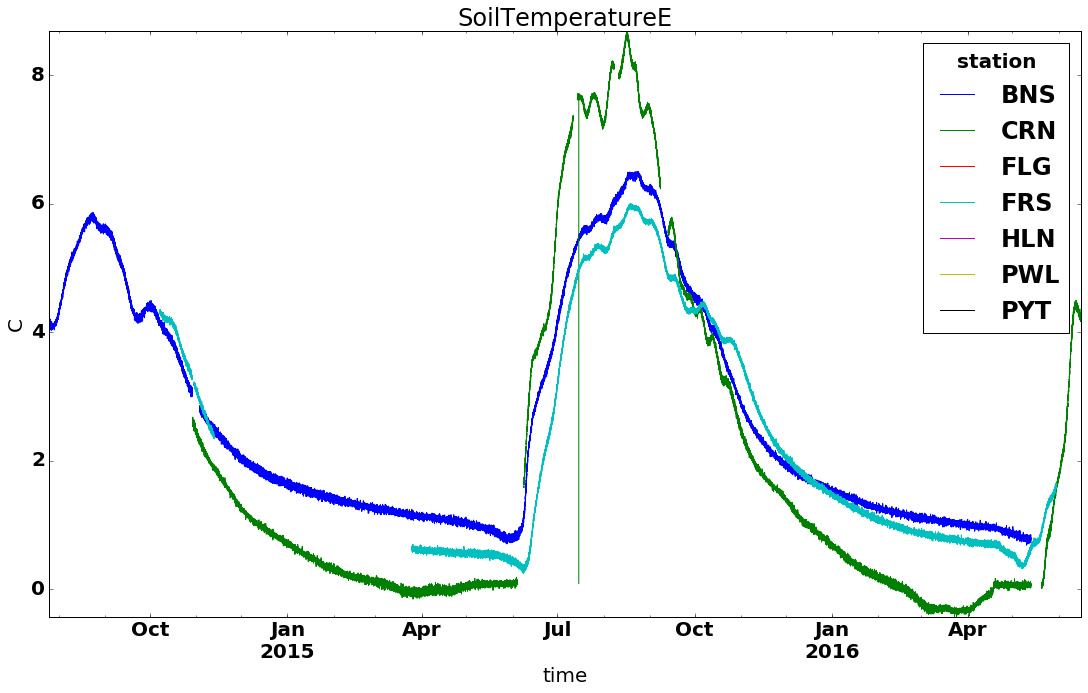

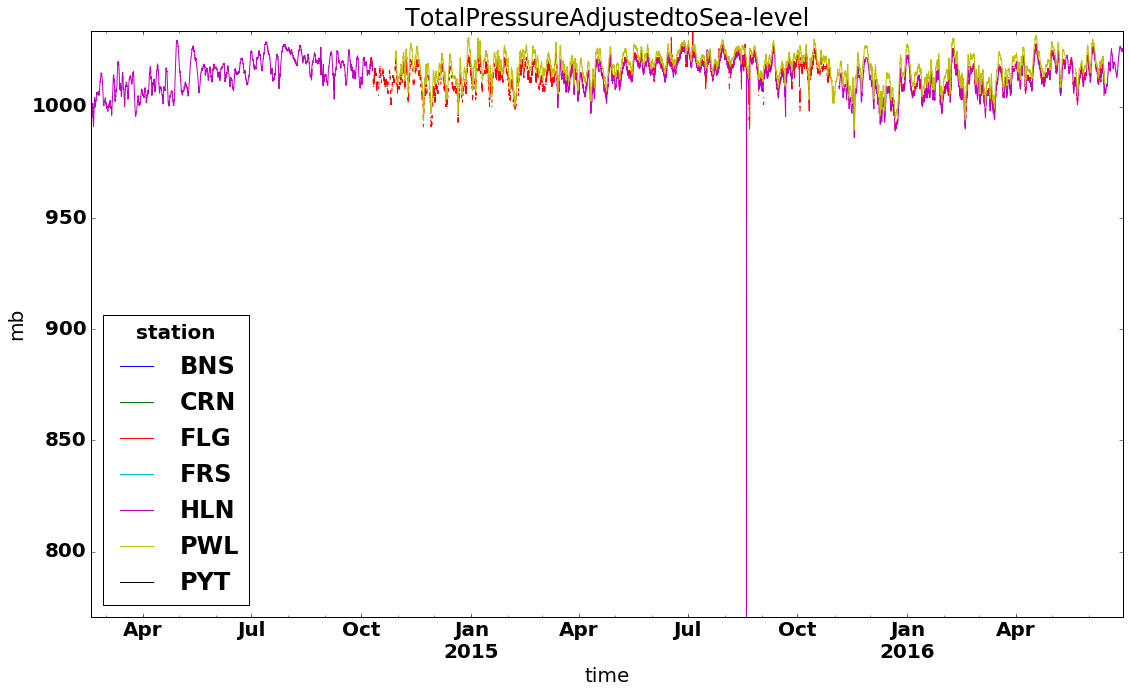

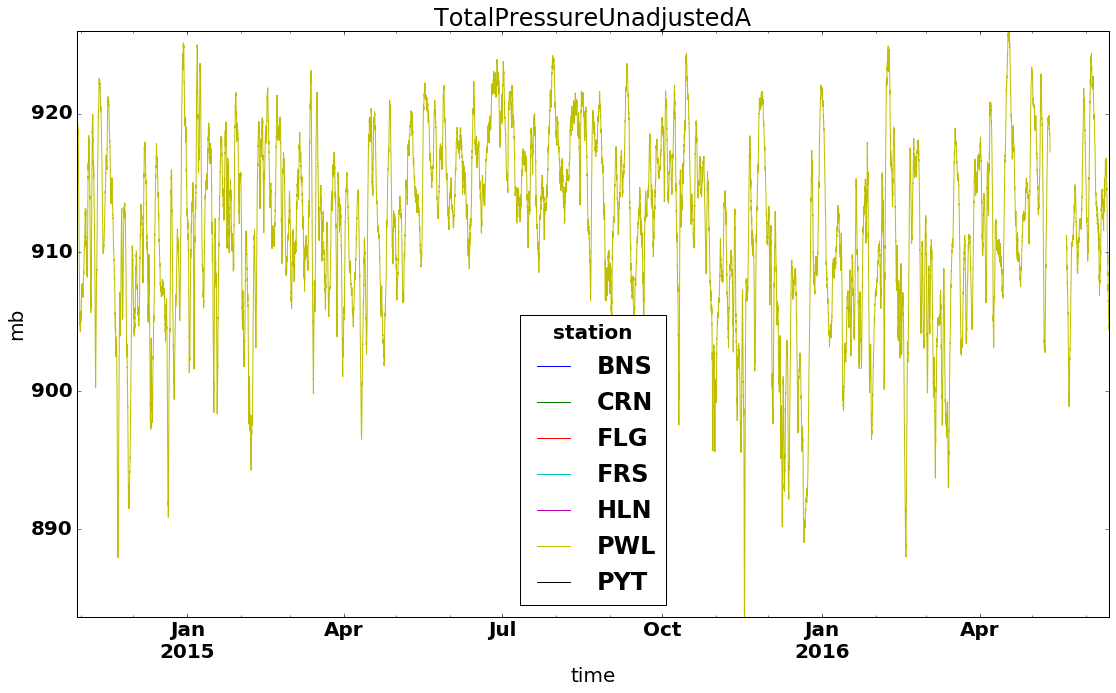

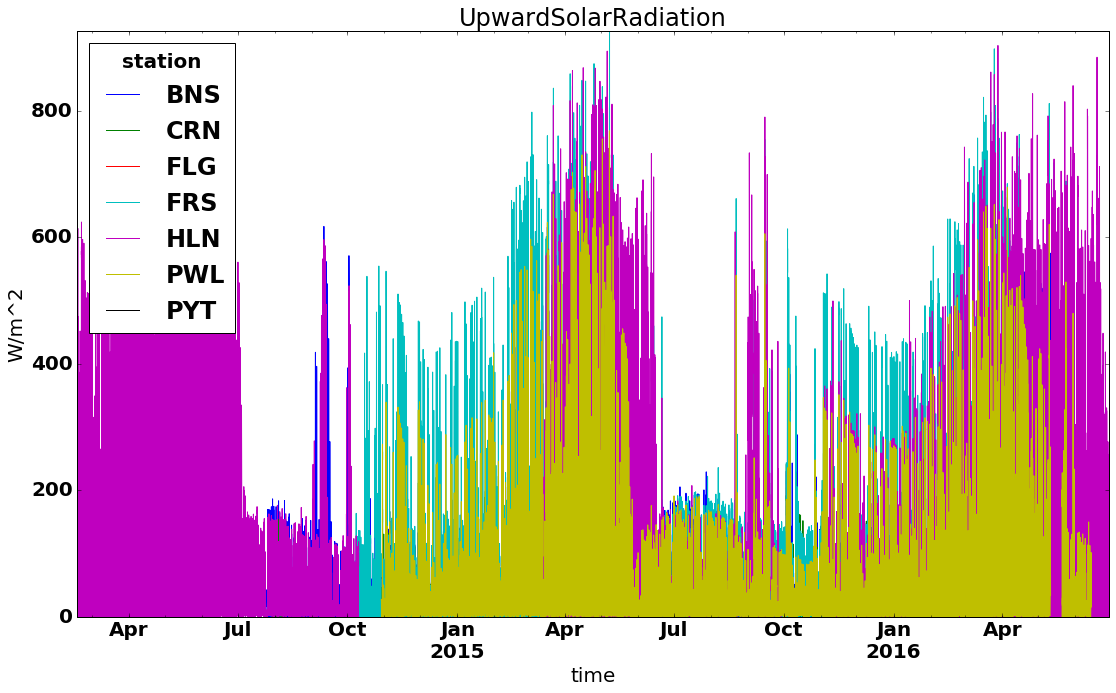

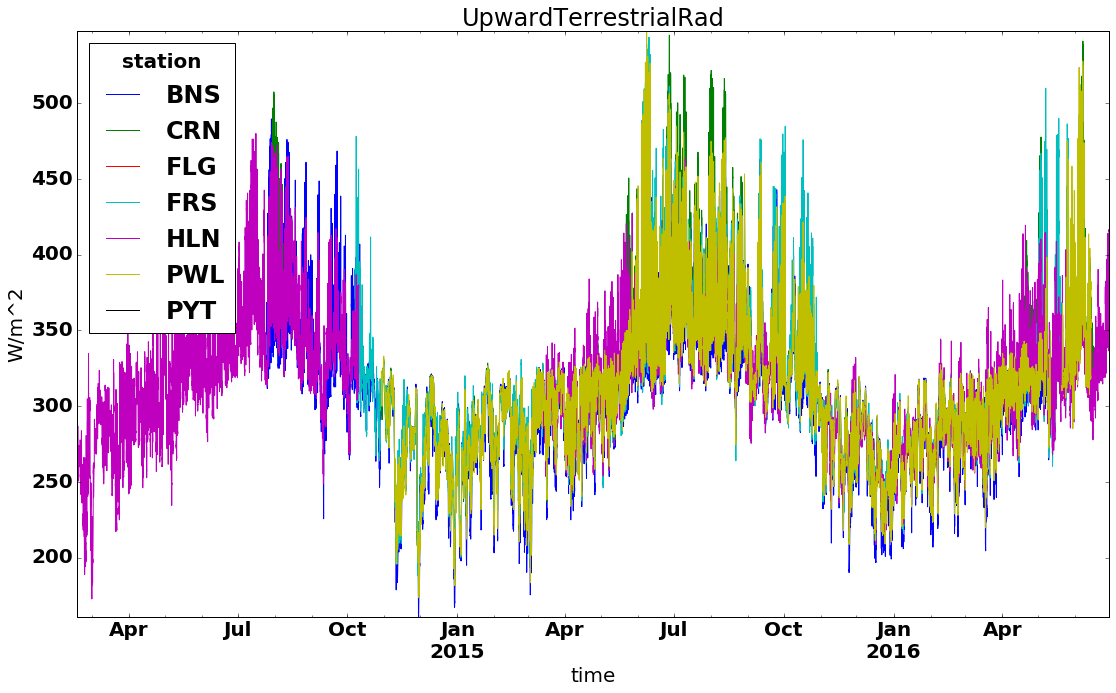

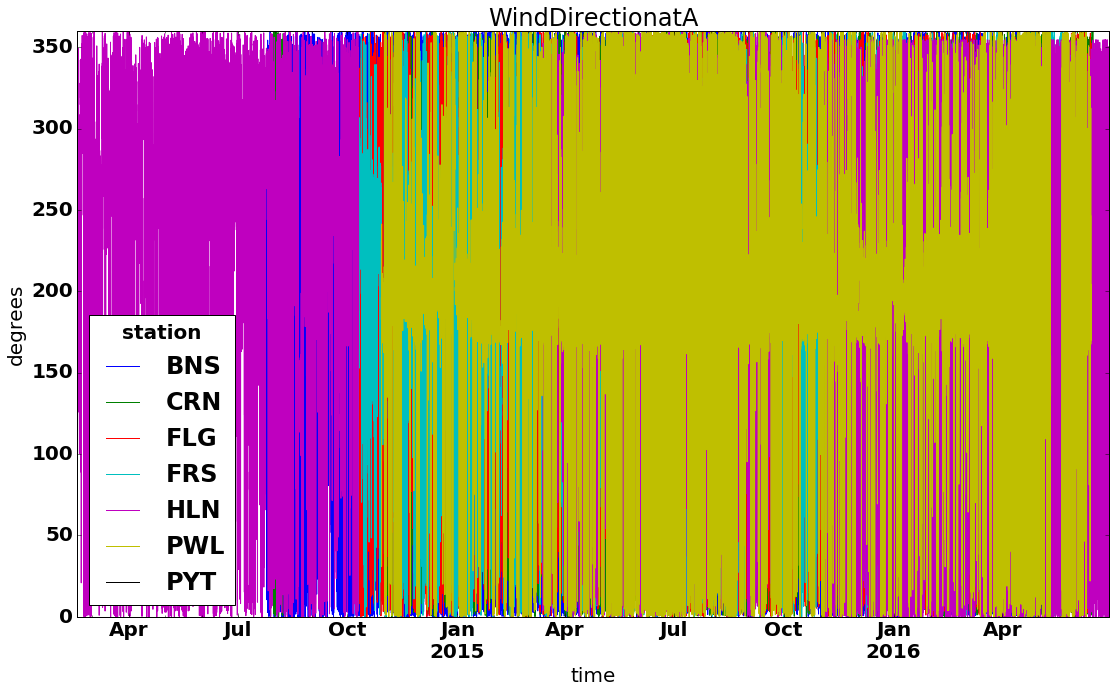

In [7]:
# Plot each variable (Takes a while, be patient)
for cvar in AllVars:
    print(cvar)
    pd_temp = CRHO_data[cvar].to_dataframe()
    X = pd_temp.unstack().T
    X.index = X.index.droplevel()
    X.plot()
    plt.title(cvar)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)
    plt.ylabel(CRHO_data[cvar].attrs['unit'])
    plt.axis("tight");